# Aufgabe 1:
Welche der beiden Funktionen können Sie benutzen, um die Distanz
zwischen zwei Strings zu berechnen?
A: Euklidische Distanz
B: Hamming-Distanz
Welchen Wert würden Sie bekommen für den Abstand zwischen s =
'cats' und t = 'dogs'?


# Aufgabe 2: 
Berechnen Sie den Euklidischen Abstand jeweils zwischen A = (1, 3) , B = (2, 3)
und C = (−1, 4).




# Aufgabe 3:
Gegeben sei die folgende Datenmenge:

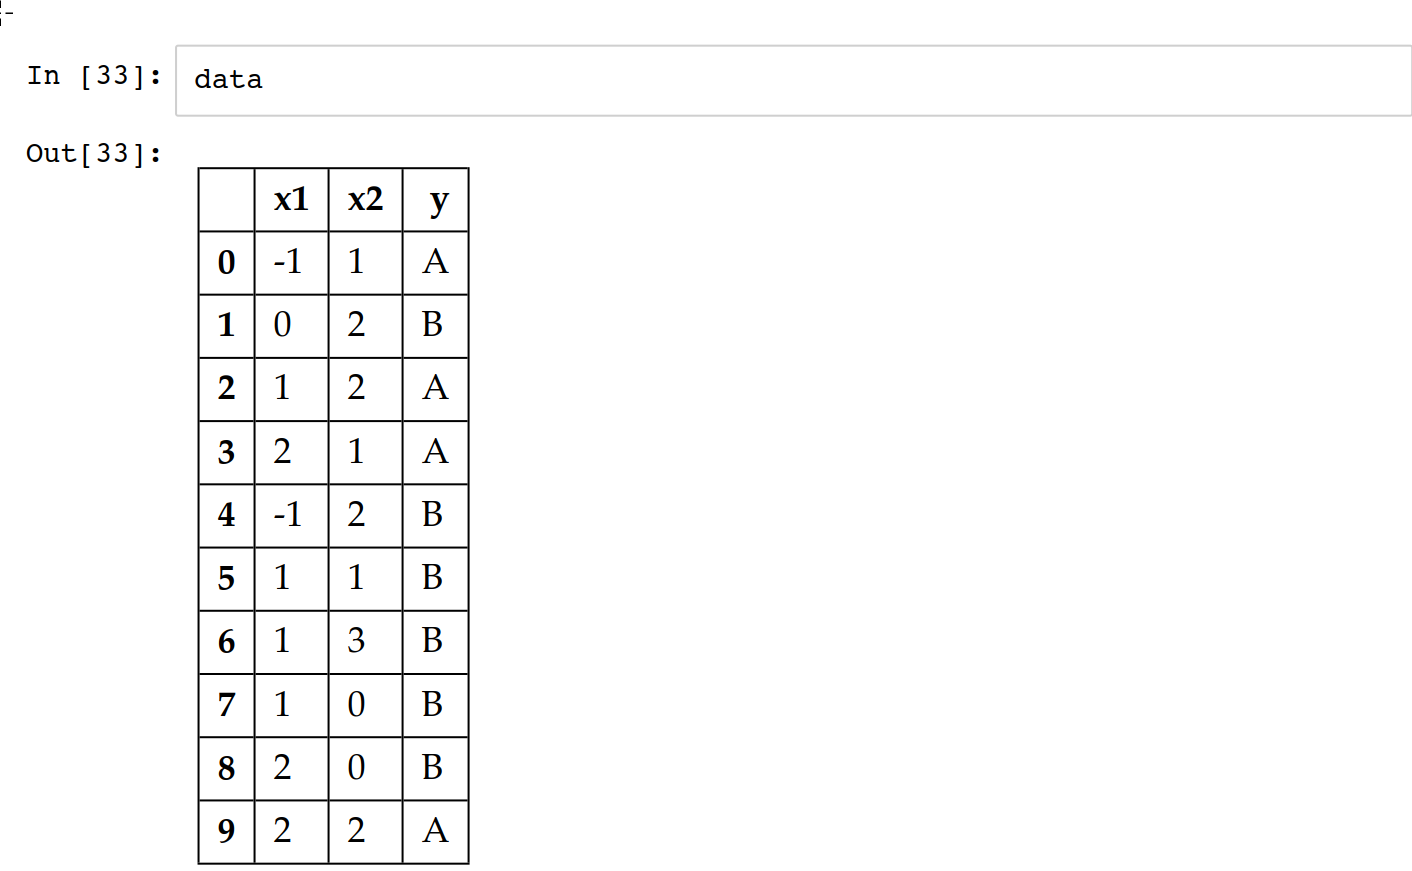

Betrachten Sie den Punkt (3,3). Welcher Klasse würde er durch den 3-NN
Algorithmus mit data als Trainingsmenge zugeordnet werden? Wie sieht
es aus mit dem Punkt (0,0)? Wie ist das Ergebnis, wenn Sie statt k = 3 nun
k = 5 verwenden? Fertigen Sie jeweils Skizzen an.

# Aufgabe 4:
Worin besteht der Unterschied zwischen k-NN als Klassifikations- und
k-NN als Regressionsalgorithmus?

# Aufgabe 5:
Benötigt der k-NN Algorithmus normalerweise mehr Rechenaufwand in
der Test-Phase als in der Trainingspahse?

# Aufgabe 6:
Sie möchten einen k-NN Klassifikator für ein binäres Problem
programmieren (d.h. Zielvariable kann genau zwei verschiedene Werte
annehmen). Was ist eine sinnvolle Regel für die Wahl von n, um beim
Majority Vote kein Unentschieden zu produzieren? Ist diese Regel auch
sinnvoll, wenn Sie mehr als zwei Klassen haben?

# Aufgabe 7:
Angenommen, Sie programmieren einen 1-NN Algorithmus und für einen
Datenpunkt x gibt es mehrere Datenpunkte , die den gleichen kleinsten
Abstand zu x haben. Wie können Sie das auflösen?

# Aufgabe 8:

Welche Möglichkeiten sehen Sie, die Entscheidungsfindung des k-NN
etwas differenzierter zu machen, so dass beispielsweise Datenpunkte, die
näher dran sind, eine größere Rolle spielen?

# Aufgabe 9:
Folge dem Code im Notebook für die Vorlesung, um den sklearn Wine-
Datensatz in einen pandas DataFrame zu laden: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine
(http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

In [54]:
#Import libs
# from sklearn.datasets  import load_wine
import sklearn.datasets as skdata
import sklearn.model_selection as skmodel
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
import numpy as np

In [ ]:
# Load data record
wine = skdata.load_wine()
#What keys do we have?
print("KEYS:", wine.keys())
#What is the target?
print("TARGETS:", wine.target_names)

In [62]:
# Erstelle einen DataFrame mit Input-Variablen und der Ziel -Variable als Spalten
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['output'] = wine.target

#Let's visualize it
df.sample(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,output
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0,0
75,11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428.0,1
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0,1


In [50]:
#Now we prepare the data to train it 

X, y = wine['data'], wine['target']
X_train, X_test, y_train, y_test = skmodel.train_test_split(X, y, test_size=0.25, random_state=0)

# Anzahl der Datensätze in der Trainings- bzw. Testmenge
print(len(X_train), len(X_test)) 


133 45


In [56]:
# Let's train the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [93]:
#Now let us predict based on ONE EXAMPLE
X_new = np.array([[12.00, 3.43, 2.00, 19.0, 87.0, 2.00, 1.64, 0.37, 1.87, 1.28, 0.93, 3.05, 564.0 ]]) # needs to be a 2-dim numpy array for sklearn
print(f"X_new.shape: {X_new.shape}")

#Here the prediction happens
predicted_class = knn.predict(X_new)
predicted_class_name = wine['target_names'][predicted_class ] # corresponding class name
print(f"Predicted output name: {predicted_class_name}")

X_new.shape: (1, 13)
Predicted output name: ['class_1']


0.7555555555555555

In [103]:
#Now lets predict with the whole test data to get a score
knn.score(X_test, y_test)

0.7555555555555555

In [101]:
test_data = pd.DataFrame(X_test, columns=wine.feature_names )
test_data['output'] = y_test 
test_data['pred_output'] = knn.predict(X_test)
#show the first 10 samples
test_data.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,output,pred_output
40,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0,2
1,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2,1
9,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1,1
4,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1,1
26,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1,1
5,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1,1
6,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,0
14,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2,1
21,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0,0,0
32,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0,1,2


In [104]:
#Finally we want to see all samples that where predicted incorrectly
test_data[test_data['output']!=test_data['pred_output']] 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,output,pred_output
1,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2,1
10,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0,2,0
11,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0,2,1
13,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1,2
14,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2,1
22,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1
24,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1,0
28,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0,1,2
32,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0,1,2
39,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,1


# Aufgabe 10 (komplexer):
Trainieren einen 1-NN Klassifikations-Algorithmus mit zwei Variablen
deiner Wahl. Denke an Normalisierung der Daten.

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.model_selection as skmodel

In [59]:
#Example: Erfolg im Beruf
#Features: Geschlecht, Bundesland
#Labels: 0 (Erfolglos),  1 (Erfolgreich)

data =  [ [20, 1.5, "ja"], [22, 4.0, "nein"], [26, 1.9, "ja"], [27, 4.5, "nein"], [30, 1.2, "ja"], [30, 3.0, "nein"] ]
columns = ["Alter", "Abiturnote", "Erfolg"]

# Erstelle einen DataFrame mit Input-Variablen und der Ziel -Variable als Spalten
df = pd.DataFrame(data, columns=columns)
#df['output'] = target

#Let's visualize it
df.sample(3)

,Alter,Abiturnote,Erfolg
3,27,4.5,nein
2,26,1.9,ja
1,22,4.0,nein


In [72]:
scaler = MinMaxScaler()
#Scale the data so that it is comparable ('Erfolg is expluded as it is a String')
data_scaled = scaler.fit_transform(df.drop('Erfolg', axis=1))
df_scaled = pd.DataFrame(data_scaled, columns=['Alter', 'Abiturnote'])
df_scaled.sample(3)

,Alter,Abiturnote
0,0.0,0.090909
2,0.6,0.212121
4,1.0,0.000000


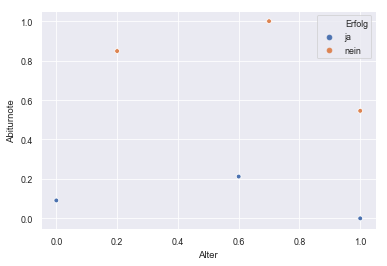

In [73]:
sns.set(color_codes=True, context="paper")
#Add the categorial column again 
df_scaled['Erfolg'] = df['Erfolg']
sns.scatterplot(x="Alter", y="Abiturnote", hue="Erfolg", data=df_scaled)

In [78]:
kn = KNeighborsClassifier(n_neighbors=1)
X_values = df_scaled.drop('Erfolg', axis=1)
y_values = df_scaled['Erfolg']
kn.fit(X_values, y_values)

transformed = scaler.fit_transform(test_set)
print(transformed)

#TODO: We dont want to hand it over scaled!
kn.predict([[1.0, 0.2]])

[[0. 0.]]


array(['ja'], dtype=object)